In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data=pd.read_csv("logement-encadrement-des-loyers.csv", sep=";")
data


,annee,id_zone,id_quartier,nom_quartier,piece,epoque,meuble_txt,ref,max,min,ville,code_grand_quartier,geo_shape,geo_point_2d
0,2021,10,49,Salpêtrière,2,Avant 1946,non meublé,24.9,29.88,17.43,PARIS,7511349,"{""coordinates"": [[[2.3563634530819235, 48.8310...","48.83740588522814,2.3633186351497173"
1,2021,3,32,Europe,2,Avant 1946,meublé,28.7,34.44,20.09,PARIS,7510832,"{""coordinates"": [[[2.3122934012325604, 48.8733...","48.87814767585103,2.317174611304884"
2,2021,14,47,Bercy,3,1971-1990,non meublé,19.1,22.92,13.37,PARIS,7511247,"{""coordinates"": [[[2.3911410378394717, 48.8261...","48.8352090498651,2.3862100842120184"
3,2021,13,80,Charonne,4,Avant 1946,meublé,23.0,27.60,16.10,PARIS,7512080,"{""coordinates"": [[[2.4160210576126833, 48.8467...","48.85476028303528,2.4074303282359684"
4,2021,3,62,Muette,4,1971-1990,meublé,28.0,33.60,19.60,PARIS,7511662,"{""coordinates"": [[[2.245624861250342, 48.87635...","48.86327454383972,2.2599358317048384"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12795,2022,6,65,Ternes,2,Avant 1946,meublé,30.3,36.36,21.21,PARIS,7511765,"{""coordinates"": [[[2.2950396186637176, 48.8737...","48.88117755028411,2.289963738115155"
12796,2022,6,58,Necker,1,1946-1970,meublé,30.9,37.08,21.63,PARIS,7511558,"{""coordinates"": [[[2.3061493100040384, 48.8478...","48.842711250324115,2.3107774536393926"
12797,2022,4,11,Archives,1,1946-1970,meublé,34.9,41.88,24.43,PARIS,7510311,"{""coordinates"": [[[2.3684797205288945, 48.8558...","48.85919241271389,2.3632050573309633"
12798,2022,5,2,Halles,2,1971-1990,non meublé,22.8,27.36,15.96,PARIS,7510102,"{""coordinates"": [[[2.349365804803004, 48.86057...","48.86228910809421,2.34489885831102"


C:\Users\brian\AppData\Local\Temp\ipykernel_31388\696955322.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), cmap="YlGnBu")


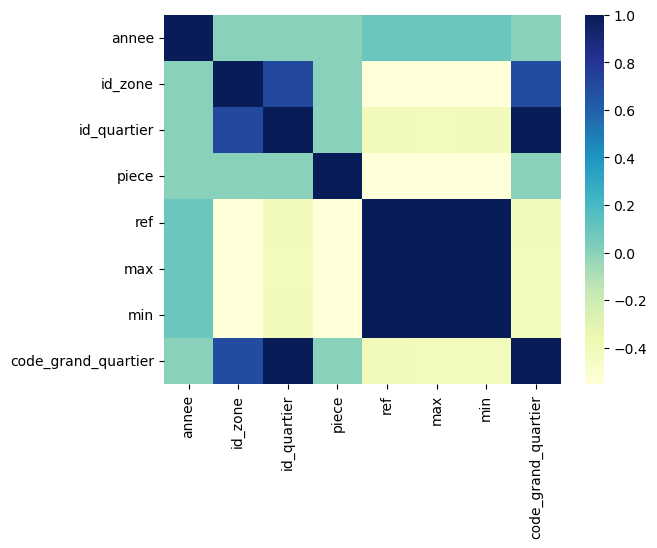

In [8]:
import seaborn as sns
sns.heatmap(data.corr(), cmap="YlGnBu")
plt.show()

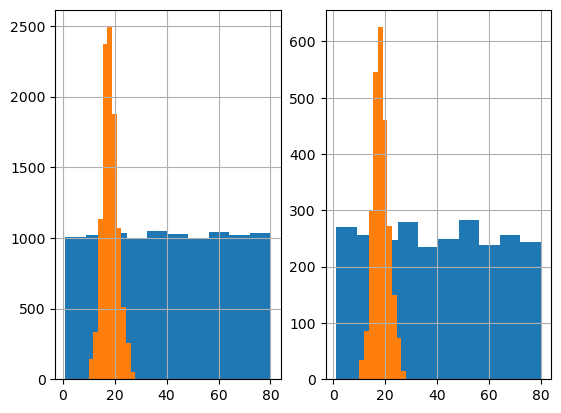

In [92]:
#partie de séparation des données en echantillon d'entrainement et de test
from sklearn.model_selection import train_test_split
split=train_test_split(data, test_size=0.2)
train_data, test_data=split
plt.subplot(1, 2, 1)
train_data["id_quartier"].hist()
train_data["min"].hist()
plt.subplot(1, 2, 2)
test_data["id_quartier"].hist()
test_data["min"].hist()
plt.show()




In [16]:
train_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10240 entries, 4989 to 5784
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   annee                10240 non-null  int64  
 1   id_zone              10240 non-null  int64  
 2   id_quartier          10240 non-null  int64  
 3   nom_quartier         10240 non-null  object 
 4   piece                10240 non-null  int64  
 5   epoque               10240 non-null  object 
 6   meuble_txt           10240 non-null  object 
 7   ref                  10240 non-null  float64
 8   max                  10240 non-null  float64
 9   min                  10240 non-null  float64
 10  ville                10240 non-null  object 
 11  code_grand_quartier  10240 non-null  int64  
 12  geo_shape            10240 non-null  object 
 13  geo_point_2d         10240 non-null  object 
dtypes: float64(3), int64(5), object(6)
memory usage: 1.2+ MB


In [20]:
nom_quartier=data["meuble_txt"].unique()
nom_quartier

array(['non meublé', 'meublé'], dtype=object)

In [62]:
#dans cette partie nous allon écrire la classe d'encodage oneHot pour notre pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder
class FeatureOneHotEncoder(BaseEstimator, TransformerMixin):
    def fit(self, X, Y=None):
        return self
    def transform(self, X):
        encoder=OneHotEncoder()
        matrix=encoder.fit_transform(X[["meuble_txt"]]).toarray()
        column_names=["meuble", "non_meuble"]
        for i in range(len(matrix.T)):
            X[column_names[i]]=matrix.T[i]
            
        return X
#danc cette seconde classe nous allon ecrire l'algorithme d'encodage frequeentielle pour notre pipeline
class FeatureFreqEncoder(BaseEstimator, TransformerMixin):
    def fit(self, X, Y=None):
        return self
    def transform(self, X):
        X_encoded=X.copy()
        columns=["nom_quartier", "epoque", "code_grand_quartier", "ville"] #ensemble des colonnes à encoder 
        for column in columns:
            frequence_column=X[column].value_counts().to_dict() #calcul pour chaque catégorie le nombre d'occurence et associe à un dict
            X_encoded[column+'_encoded']=X[column].map(frequence_column)
            X_encoded=X_encoded.drop(columns=[column])
        return X_encoded
    
    
        

In [63]:
#dans cette partie nous allons ecrire les algorithmes permettant supprimer le colonnes inutiles
class FeatureDropper(BaseEstimator, TransformerMixin):
    def fit(self, X, Y=None):
        return self
    def transform(self, X):
        return X.drop(["geo_shape", "geo_point_2d", "meuble_txt"], axis=1, errors="ignore")
    

In [64]:
#creation du pipeline
from sklearn.pipeline import Pipeline
pipeline=Pipeline([("featureonehotencoder", FeatureOneHotEncoder()),
                  ("featurefreqencoder", FeatureFreqEncoder()),
                  ("FeatureDropper", FeatureDropper())])


In [65]:
#à présent nous allons faire passer les données dans le pipeline
train_data_f=pipeline.fit_transform(train_data)
test_data_f=pipeline.fit_transform(test_data)

In [67]:
train_data_f

,annee,id_zone,id_quartier,piece,ref,max,min,meuble,non_meuble,nom_quartier_encoded,epoque_encoded,code_grand_quartier_encoded,ville_encoded
4989,2020,4,19,2,25.7,30.84,17.99,1.0,0.0,121,2530,121,10240
7085,2023,2,15,1,38.0,45.60,26.60,1.0,0.0,125,2588,125,10240
1412,2019,13,75,4,17.1,20.50,12.00,1.0,0.0,125,2561,125,10240
6773,2023,4,6,4,27.5,33.00,19.30,1.0,0.0,131,2530,131,10240
9201,2022,4,6,1,31.0,37.20,21.70,0.0,1.0,131,2561,131,10240
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1430,2023,4,14,3,29.2,35.00,20.40,1.0,0.0,133,2588,133,10240
8949,2021,8,57,3,22.7,27.24,15.89,0.0,1.0,132,2588,132,10240
11861,2022,5,36,1,31.8,38.16,22.26,1.0,0.0,134,2561,134,10240
5374,2019,11,68,2,22.1,26.50,15.50,0.0,1.0,121,2561,121,10240


In [130]:
#etant donné qu'on va utiliser la regression on cherche le kBest (le meillezur Feature pour definir notre Target)
X_full=train_data_f.drop(["ref", "max", "min"], axis=1)
Y=train_data_f["ref"]
Y.fillna(method="ffill")
X_full.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 10240 entries, 4989 to 5784
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   annee                        10240 non-null  int64  
 1   id_zone                      10240 non-null  int64  
 2   id_quartier                  10240 non-null  int64  
 3   piece                        10240 non-null  int64  
 4   meuble                       10240 non-null  float64
 5   non_meuble                   10240 non-null  float64
 6   nom_quartier_encoded         10240 non-null  int64  
 7   epoque_encoded               10240 non-null  int64  
 8   code_grand_quartier_encoded  10240 non-null  int64  
 9   ville_encoded                10240 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 880.0 KB


In [131]:
#maintenant nous allons creer le modèle
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor(n_estimators=3, random_state=0)
regressor.fit(X_full, Y)



RandomForestRegressor(n_estimators=3, random_state=0)

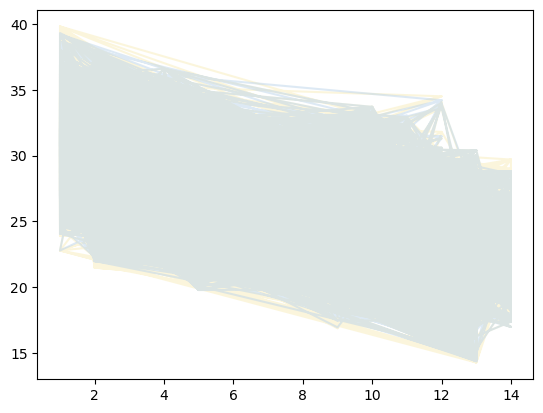

In [137]:
plt.plot(X_full["id_zone"], Y, color='#F4E29150')
plt.plot(X_full["id_zone"], regressor.predict(X_full), color='#BDD5EA80')
plt.show()